In [2]:
import tensorflow as tf
print(tf.__version__)

2.20.0


Handwritten Digits Model

In [5]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 10.5 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 12.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 8.4 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 8.4 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 6.3 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 6.2 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 5.0 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 3.8 MB/s eta 0:00:01
   ------------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [64]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

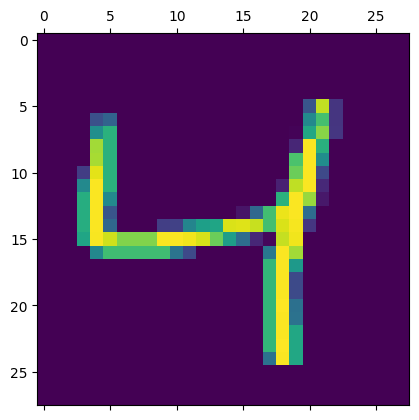

In [7]:
plt.matshow(x_train[2])

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [16]:
x_train.shape

(60000, 28, 28)

In [24]:
x_train = x_train / 255
x_test = x_test / 255

In [25]:
x_train_flatten = x_train.reshape(len(x_train),28*28)

In [26]:
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [27]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8753 - loss: 0.4712
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9157 - loss: 0.3037
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9211 - loss: 0.2833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9236 - loss: 0.2728
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9254 - loss: 0.2668


In [28]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9252 - loss: 0.2647


[0.26470690965652466, 0.9251999855041504]

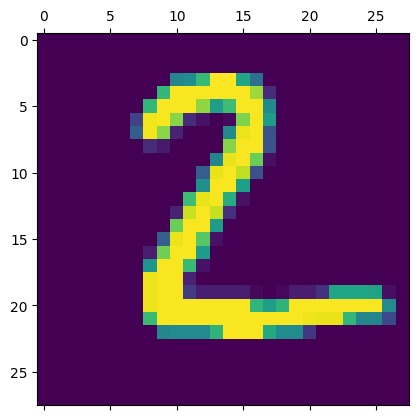

In [45]:
plt.matshow(x_test[1])

In [46]:
y_predicted = model.predict(x_test_flatten)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([5.00676990e-01, 4.85311868e-03, 9.99585271e-01, 3.00809741e-01,
       8.75212847e-10, 8.26456726e-01, 8.65129113e-01, 1.35767612e-12,
       1.15087464e-01, 4.61396787e-09], dtype=float32)

In [48]:
np.argmax(y_predicted[1])

np.int64(2)

In [50]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [52]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,    9,  925,   17,    7,    4,   11,   11,   36,    5],
       [   4,    0,   20,  923,    0,   22,    2,   12,   20,    7],
       [   2,    1,    4,    1,  911,    0,    7,    4,   10,   42],
       [  11,    3,    5,   35,   11,  772,   13,    7,   28,    7],
       [  14,    3,    8,    1,    7,   13,  908,    2,    2,    0],
       [   1,    5,   23,    5,    8,    0,    0,  951,    2,   33],
       [   9,    9,    6,   20,    9,   28,    8,   13,  865,    7],
       [  11,    7,    1,   10,   26,    6,    0,   23,    5,  920]],
      dtype=int32)>

In [54]:
pip install seaborn

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.3 MB 1.0 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/11.3 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.3 MB 1.2 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.3 MB 1.3 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.3 MB 1.5 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.3 MB 1.5 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/11.3 MB 1.4 MB/s eta 0:00:07
   ---------- ----------------------------- 2.9/

Text(95.72222222222221, 0.5, 'Truth')

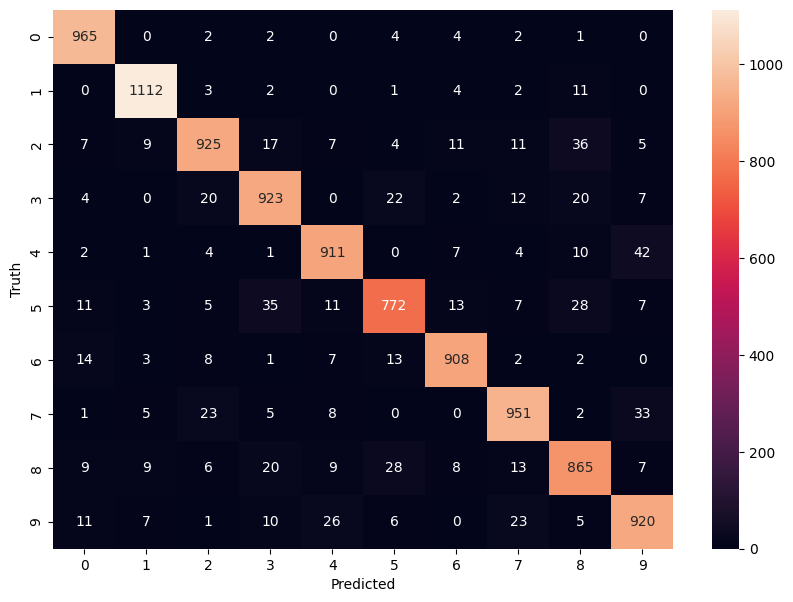

In [55]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten, y_train, epochs=5)

C:\Users\rahul\.conda\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9236 - loss: 0.2705
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9656 - loss: 0.1184
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9750 - loss: 0.0833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9808 - loss: 0.0640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9849 - loss: 0.0497


In [61]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,    9,  925,   17,    7,    4,   11,   11,   36,    5],
       [   4,    0,   20,  923,    0,   22,    2,   12,   20,    7],
       [   2,    1,    4,    1,  911,    0,    7,    4,   10,   42],
       [  11,    3,    5,   35,   11,  772,   13,    7,   28,    7],
       [  14,    3,    8,    1,    7,   13,  908,    2,    2,    0],
       [   1,    5,   23,    5,    8,    0,    0,  951,    2,   33],
       [   9,    9,    6,   20,    9,   28,    8,   13,  865,    7],
       [  11,    7,    1,   10,   26,    6,    0,   23,    5,  920]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

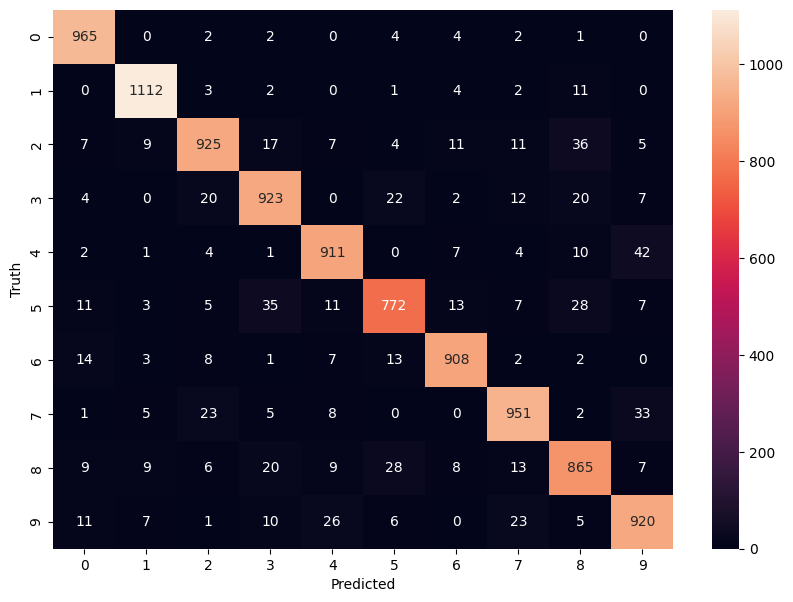

In [62]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=5)

C:\Users\rahul\.conda\envs\tf\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\rahul\.conda\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9242 - loss: 0.2689
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9639 - loss: 0.1222
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9729 - loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9798 - loss: 0.0655
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9840 - loss: 0.0516
